## Set-up

In [ ]:
#PRIOR TO DELIVERY, RUN THIS CELL AND THEN DELETE IT (esc, D, D)
%matplotlib inline

In [1]:
# Import libraries
import quandl
import matplotlib.pyplot as plt
import datetime

# Set-up Quandl configuration
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"

## Load data

In [2]:
# Request data
data = quandl.get("BCB/UDJIAD1") #Dow Jones Industrial Average

In [3]:
# Inspect data
data.tail()

,Value
Date,
2016-04-11,17556.41
2016-04-12,17721.25
2016-04-13,17908.28
2016-04-14,17926.43
2016-04-15,17897.46


<AxesSubplot:xlabel='Date', ylabel='value'>

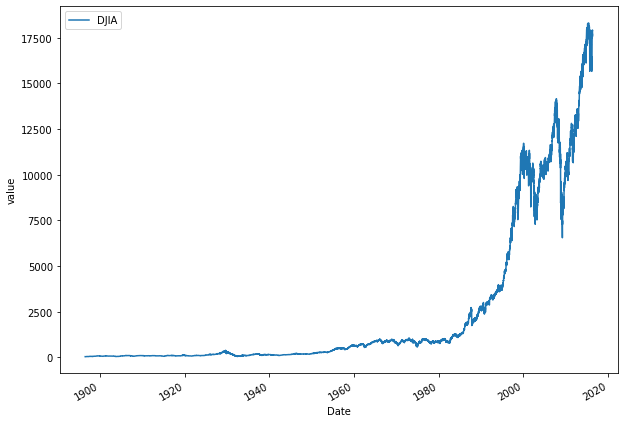

In [5]:
# Rename header
data.columns = ["DJIA"]

# Generate plot
data.plot(figsize=(10,7.5), ylabel = "value")

## Process data

(0.0, 25000.0)

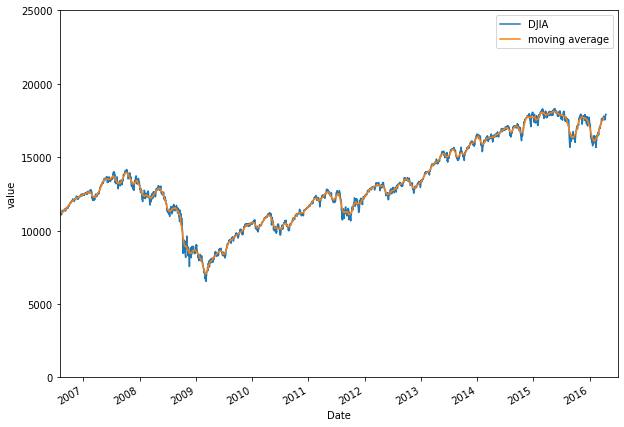

In [8]:
# Overlay rolling average
data["moving average"] = data.rolling(21,center=True).mean()
data.plot(figsize=(10,7.5), ylabel = "value")

# Restrict view
start_date = datetime.date(2006, 8, 1)
end_date = datetime.date(2016, 7, 1)
plt.xlim([start_date, end_date])
plt.ylim(0,25000)

(0.0, 25000.0)

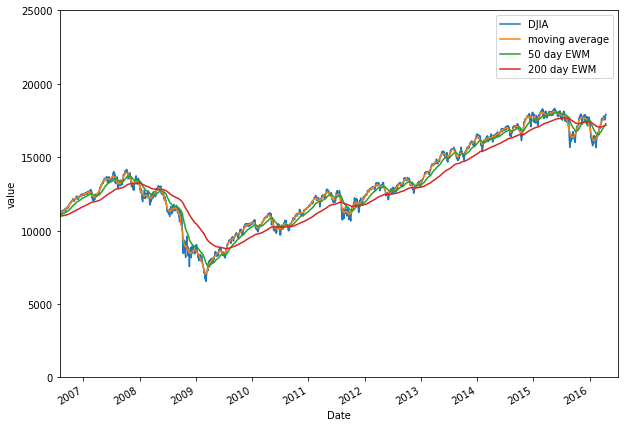

In [10]:
# Overlay exponentially weighted functions 
data["50 day EWM"] = data["DJIA"].ewm(span=50).mean()
data["200 day EWM"] = data["DJIA"].ewm(span=200).mean()
data.plot(figsize=(10,7.5), ylabel = "value")

# Restrict view
start_date = datetime.date(2006, 8, 1)
end_date = datetime.date(2016, 7, 1)
plt.xlim([start_date, end_date])
plt.ylim(0,25000)

## Model data

In [17]:
# Import FB Prophet
from fbprophet import Prophet

In [32]:
# Create subset
data_sub = data["2006-01-01":]
data_sub

,DJIA,moving average,50 day EWM,200 day EWM
Date,,,,
2006-01-03,10847.41,10881.419524,10728.674449,10561.496425
2006-01-04,10880.15,10881.663333,10734.614667,10564.667108
2006-01-05,10882.15,10873.609048,10740.400366,10567.826142
2006-01-06,10959.31,10868.048095,10748.985058,10571.721503
2006-01-09,11011.90,10862.261905,10759.295447,10576.101389
...,...,...,...,...
2016-04-11,17556.41,NaN,17180.755778,17141.674769
2016-04-12,17721.25,NaN,17201.951630,17147.441687
2016-04-13,17908.28,NaN,17229.650782,17155.012218


In [33]:
# Get the data in the format that fbprophet wants it
data_forecast = data_sub.reset_index()
data_forecast = data_forecast[["Date", "DJIA"]].rename(columns={"Date": "ds", "DJIA": "y"})

In [34]:
# Fit Prophet model
m = Prophet()
m.fit(data_forecast)
future = m.make_future_dataframe(periods=int(3*365))
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
# Inspect forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,9403.406068,16731.936211,17123.892579,9403.406068,9403.406068,7528.456470,7528.456470,7528.456470,7528.456470,7528.456470,7528.456470,0.0,0.0,0.0,16931.862539
1,2016-01-05,9334.935984,16648.419527,17054.656416,9334.935984,9334.935984,7529.299208,7529.299208,7529.299208,7529.299208,7529.299208,7529.299208,0.0,0.0,0.0,16864.235192
2,2016-01-06,9266.465900,16565.563081,16959.035685,9266.465900,9266.465900,7507.641651,7507.641651,7507.641651,7507.641651,7507.641651,7507.641651,0.0,0.0,0.0,16774.107551
3,2016-01-07,9197.995816,16492.366762,16896.270674,9197.995816,9197.995816,7506.930993,7506.930993,7506.930993,7506.930993,7506.930993,7506.930993,0.0,0.0,0.0,16704.926809
4,2016-01-08,9129.525732,16459.787571,16868.521224,9129.525732,9129.525732,7541.021945,7541.021945,7541.021945,7541.021945,7541.021945,7541.021945,0.0,0.0,0.0,16670.547677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,2019-04-11,24087.840173,-65231.036042,122940.199165,-72724.105055,115496.346553,7506.930993,7506.930993,7506.930993,7506.930993,7506.930993,7506.930993,0.0,0.0,0.0,31594.771166
1163,2019-04-12,24100.476113,-65392.703968,123231.115337,-72820.958391,115636.323956,7541.021945,7541.021945,7541.021945,7541.021945,7541.021945,7541.021945,0.0,0.0,0.0,31641.498058
1164,2019-04-13,24113.112053,-91891.261916,96801.551190,-72918.750999,115776.301359,-18806.665114,-18806.665114,-18806.665114,-18806.665114,-18806.665114,-18806.665114,0.0,0.0,0.0,5306.446939
1165,2019-04-14,24125.747993,-91853.493476,97040.887735,-73016.745320,115916.278762,-18806.685154,-18806.685154,-18806.685154,-18806.685154,-18806.685154,-18806.685154,0.0,0.0,0.0,5319.062840


(13361.0, 18078.0)

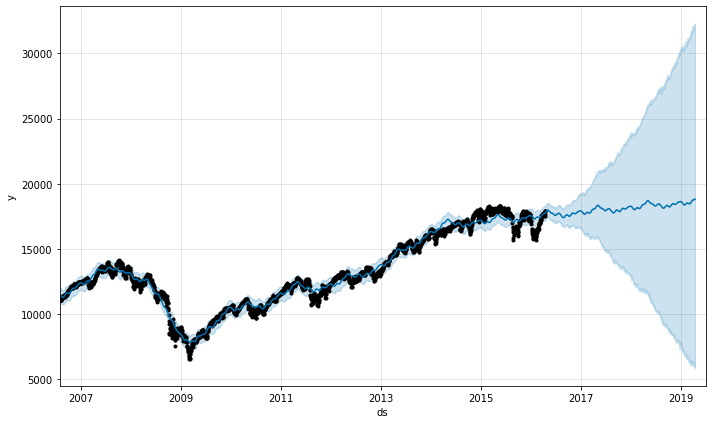

In [35]:
# Plot forecast
m.plot(forecast)
plt.xlim([datetime.date(2006, 8, 1), datetime.date(2019, 7, 1)])

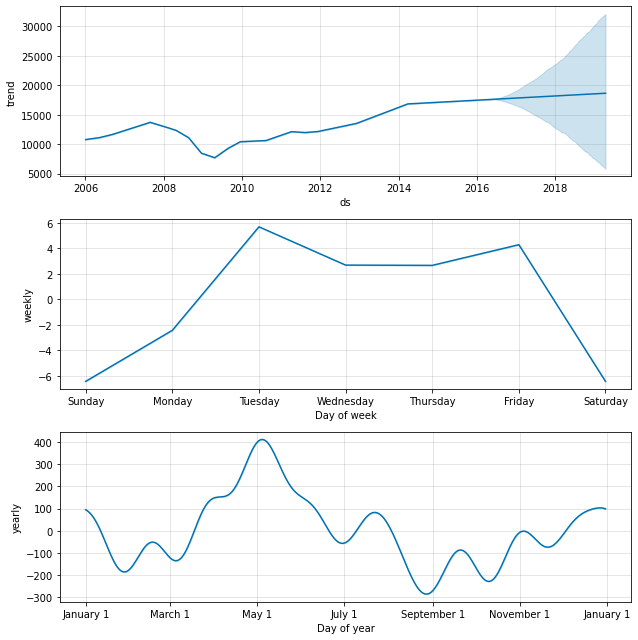

In [36]:
# Plot decomposition
m.plot_components(forecast);